# Reconstructing spatial coordination for mouse brain cortex

In [1]:
import stSCI
import scanpy as sc
import squidpy as sq

## Data preprocessing

We load the SC and ST data from the [squidpy](https://squidpy.readthedocs.io/en/stable/) package.

In [2]:
sc_adata = sq.datasets.sc_mouse_cortex()
sc_adata.var_names_make_unique()
sc_adata.obs_names_make_unique()
sc.pp.normalize_total(sc_adata, target_sum=1e4)
sc.pp.log1p(sc_adata)

For ST data, we selected the cortex part from the mouse brain for integrating with the SC data.

In [3]:
st_adata = sq.datasets.visium_fluo_adata()
st_adata = st_adata[[
    'Cortex' == label.split('_')[0] 
    for label in st_adata.obs['cluster']
]]
st_adata.var_names_make_unique()
st_adata.obs_names_make_unique()
sc.pp.normalize_total(st_adata, target_sum=1e4)
sc.pp.log1p(st_adata)

## Model training

For reconstruct spatial coordination, set the `coor_reconstruction` parameter to `True` to generate the predicted coordination for SC data. The predicted coordination will save at `sc_adata.obsm['spatial']`.

In [4]:
sc_adata, st_adata = stSCI.train(sc_adata, st_adata, cluster_key='cell_subclass', coor_reconstruction=True)

>>> INFO: Filtered 1890 genes.
>>> INFO: Find 1110 same HVGs, result data shapes: [(21697, 1110), (1259, 1110)].
>>> INFO: Generate 8813 edges, 6.000 edges per spot (0.01s).
>>> INFO: Finish PCA (0.67s).
>>> INFO: Finish centroid generation (2.02s).
>>> INFO: Finish centroid generation (0.02s).


>>> Train stSCI: 100%|██████████| 500/500 [00:51<00:00,  9.64it/s]


>>> INFO: Generate 54872 MNN pairs, 2.529 pairs per SC cell; 43.584 pairs per ST spot (0.38s).
>>> Set distance threshold to 278.820.


>>> INFO: Train SC coordination: 100%|██████████| 21697/21697 [00:07<00:00, 2978.13it/s]

>>> INFO: Train SC coordination (7.84s).
>>> INFO: Train stSCI model (75.71s).


## Visualization

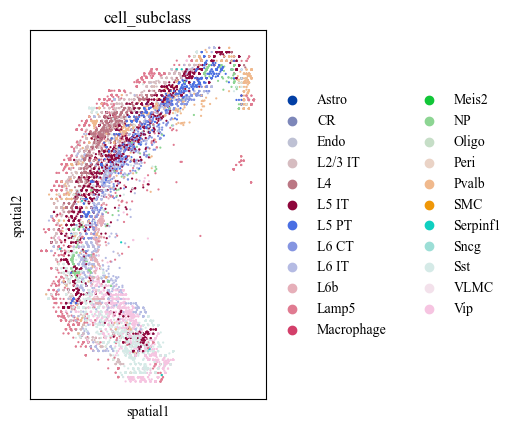

In [5]:
sc.pl.spatial(sc_adata, color='cell_subclass', spot_size=120)